# Puerta CNOT

### Explicación de la puerta
El primero de los qubits se denomina qubit de control, mientras que el segundo qubit objetivo. 
El qubit de control no varía en la transformación, sin embargo, si determina si el qubit de destino debe realizar una operación de puerta X o permanecer invariable. 
Su representación matricial es la siguiente: 

$$
CNOT = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$


### Circuito con Qiskit y Matplot



Circuito con la puerta CNOT: 


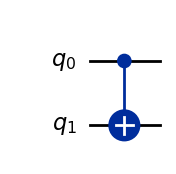

In [43]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

qc = QuantumCircuit(2)
qc.cx(0,1)

print("\nCircuito con la puerta CNOT: ")
qc.draw('mpl')

### Representación esfera de Bloch

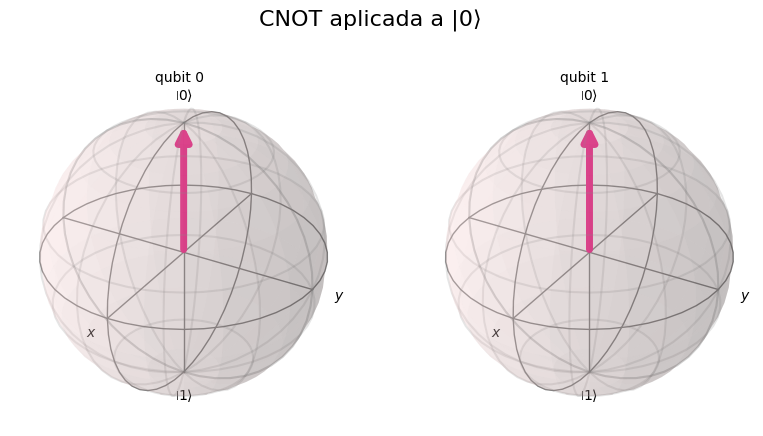

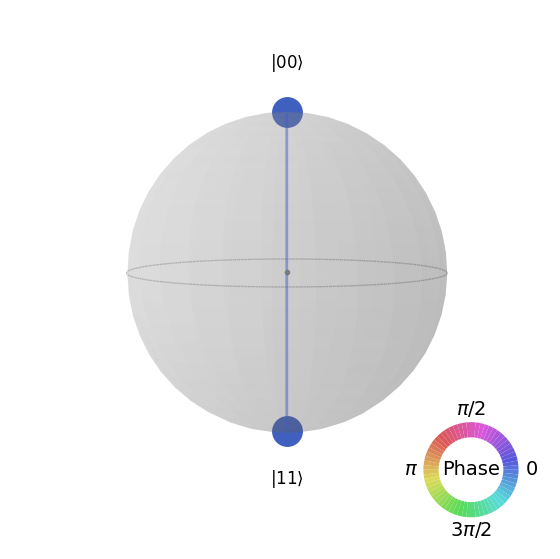

In [42]:
qc_with_H = QuantumCircuit(2)
qc_with_H.h(0)
qc_with_H.cx(0,1)

state_not_H = Statevector.from_instruction(qc)
state_with_H = Statevector.from_instruction(qc_with_H)


display(plot_bloch_multivector(state_not_H, title= "CNOT aplicada a |0⟩"))
plot_state_qsphere(state_with_H)



### Medición de los circuitos tras 1 shot y tras 1024 shots



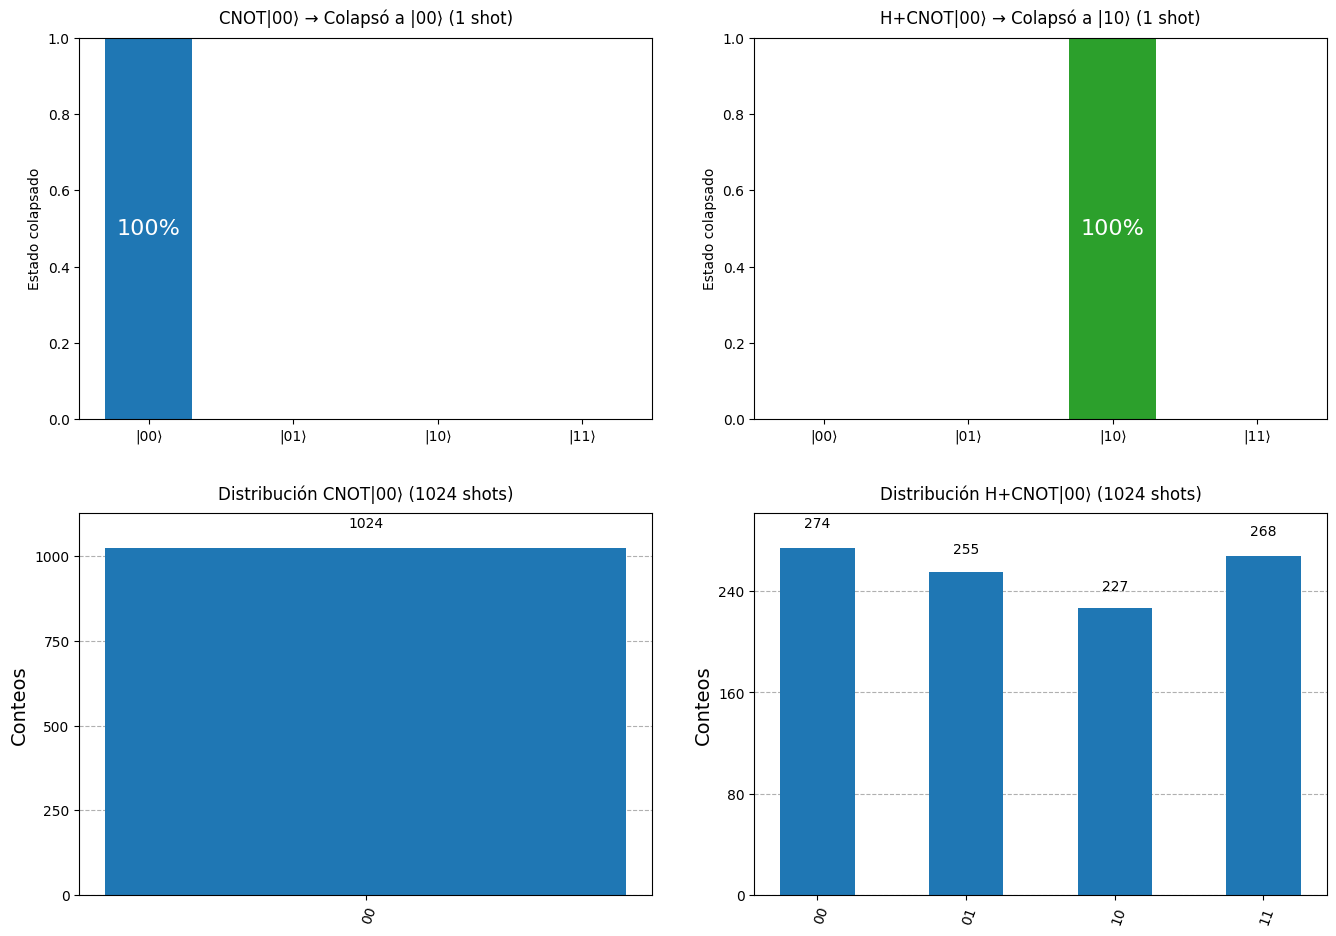

In [ ]:
qc_not_H = QuantumCircuit(2, 2)  
qc_not_H.cx(0, 1) 
qc_not_H.measure([0, 1], [0, 1])  

qc_with_H = QuantumCircuit(2, 2)
qc_with_H.h(0)     
qc_with_H.h(1)  
qc_with_H.cx(0, 1)  
qc_with_H.measure([0, 1], [0, 1])


simulator = Aer.get_backend('qasm_simulator')


result_not_H = simulator.run(transpile(qc_not_H, simulator), shots=1, memory=True).result()
result_with_H = simulator.run(transpile(qc_with_H, simulator), shots=1, memory=True).result()
measure_not_H = result_not_H.get_memory()[0]
measure_with_H = result_with_H.get_memory()[0]


counts_not_H = simulator.run(transpile(qc_not_H, simulator), shots=1024).result().get_counts()
counts_with_H = simulator.run(transpile(qc_with_H, simulator), shots=1024).result().get_counts()


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.bar(['|00⟩', '|01⟩', '|10⟩', '|11⟩'], 
        [1 if measure_not_H == '00' else 0,
         1 if measure_not_H == '01' else 0,
         1 if measure_not_H == '10' else 0,
         1 if measure_not_H == '11' else 0],
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], width=0.6)
plt.title("CNOT|00⟩ → Colapsó a |{}⟩ (1 shot)".format(measure_not_H), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")

for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height/2, '100%', 
                ha='center', va='center', fontsize=16, color='white')


plt.subplot(2, 2, 2)
bars = plt.bar(['|00⟩', '|01⟩', '|10⟩', '|11⟩'], 
        [1 if measure_with_H == '00' else 0,
         1 if measure_with_H == '01' else 0,
         1 if measure_with_H == '10' else 0,
         1 if measure_with_H == '11' else 0],
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], width=0.6)
plt.title("H+CNOT|00⟩ → Colapsó a |{}⟩ (1 shot)".format(measure_with_H), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")

for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height/2, '100%', 
                ha='center', va='center', fontsize=16, color='white')


plt.subplot(2, 2, 3)
plot_histogram(counts_not_H, ax=plt.gca())
plt.title("Distribución CNOT|00⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")


plt.subplot(2, 2, 4)
plot_histogram(counts_with_H, ax=plt.gca())
plt.title("Distribución H+CNOT|00⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")

plt.tight_layout(pad=3.0)

### Circuito medido 


Circuito medido: 


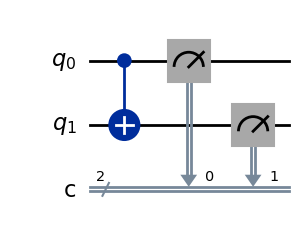

In [37]:
print("\nCircuito medido: ")
qc_not_H.draw('mpl')